# Bankruptcy EDA Analysis — Project Template

**Student Name:** Madhuri Gundlakunta
**Date:** 15-02-2026

## Objective
Perform Exploratory Data Analysis (EDA) on the Bankruptcy dataset to:
- Understand the data (shape, types, missing values, duplicates)
- Explore target distribution and class imbalance
- Analyze distributions, outliers, correlations
- Identify key drivers of bankruptcy risk
- Summarize insights & recommendations

> **Note:** Replace all TODOs with your work, charts, and explanations.


## 1) Setup & Imports


In [1]:
# TODO: Run this cell first
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Optional (uncomment if installed)
# import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)


## 2) Load Dataset


In [2]:
# TODO: Update the path/filename
# Example: df = pd.read_csv("bankruptcy.csv")

df = pd.read_csv("/content/Bankruptency_dataset.csv")

df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

## 3) Quick Overview


In [3]:
# Shape: (rows, columns)
df.shape


(6819, 96)

In [4]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Summary statistics
df.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


# 4) Identify Target Column

In [7]:
# Replace with your actual target column name
TARGET_COL = "Bankrupt?"

# Value counts
df[TARGET_COL].value_counts(dropna=False)

,count
Bankrupt?,
0,6599
1,220


In [8]:
# Class proportions
df[TARGET_COL].value_counts(normalize=True, dropna=False)


,proportion
Bankrupt?,
0,0.967737
1,0.032263


# Target Distribution Plot

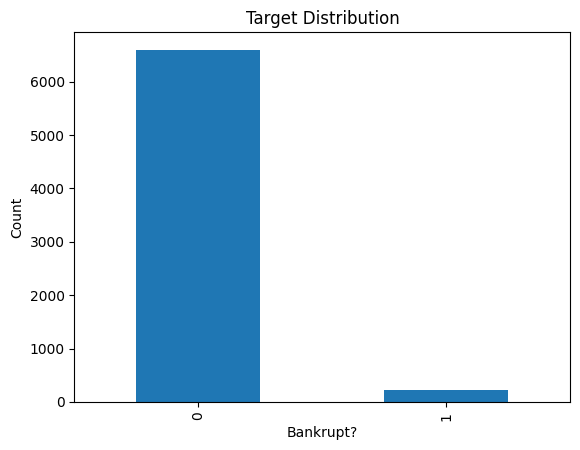

In [9]:
df[TARGET_COL].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.xlabel(TARGET_COL)
plt.ylabel("Count")
plt.show()


# 5) Data Quality Checks

5.1 Missing Value

In [10]:
missing = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": df.isna().mean() * 100
}).sort_values("missing_pct", ascending=False)

missing.head(20)


,missing_count,missing_pct
Bankrupt?,0,0.0
ROA(C) before interest and depreciation before interest,0,0.0
ROA(A) before interest and % after tax,0,0.0
ROA(B) before interest and depreciation after tax,0,0.0
Operating Gross Margin,0,0.0
Realized Sales Gross Margin,0,0.0
Operating Profit Rate,0,0.0
Pre-tax net Interest Rate,0,0.0
After-tax net Interest Rate,0,0.0
Non-industry income and expenditure/revenue,0,0.0


Handling Missing Values

In [11]:
# Option 1: Drop missing rows (if very few)
# df = df.dropna()

# Option 2: Fill numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())


 5.2 Duplicate Rows

In [12]:
# Count duplicates
df.duplicated().sum()


np.int64(0)

In [13]:
# Remove duplicates
df = df.drop_duplicates()


5.3 Data Types

In [14]:
df.dtypes.value_counts()


,count
float64,93
int64,3


# 6) Univariate Analysis

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

len(num_cols), len(cat_cols)


(96, 0)

6.1 Numeric Distributions

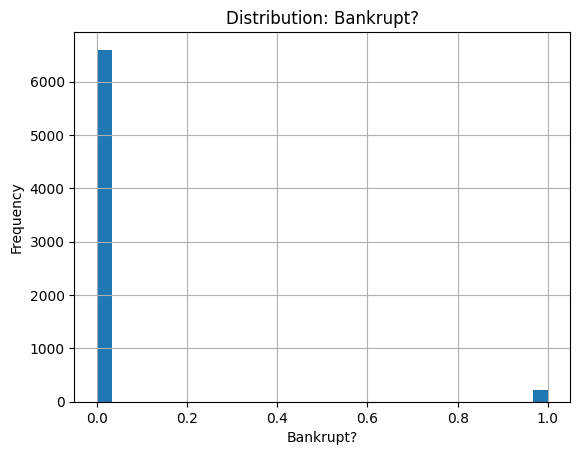

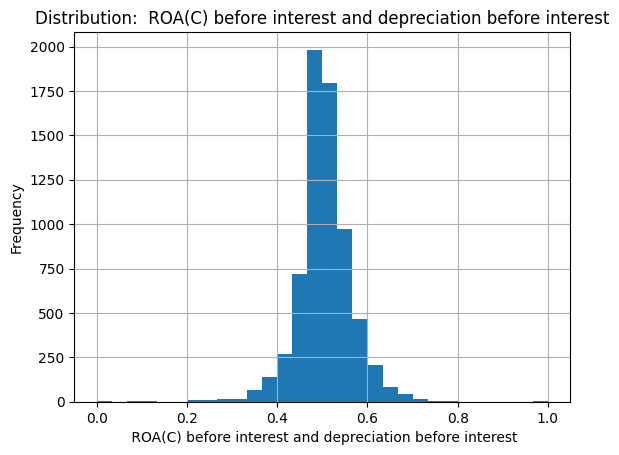

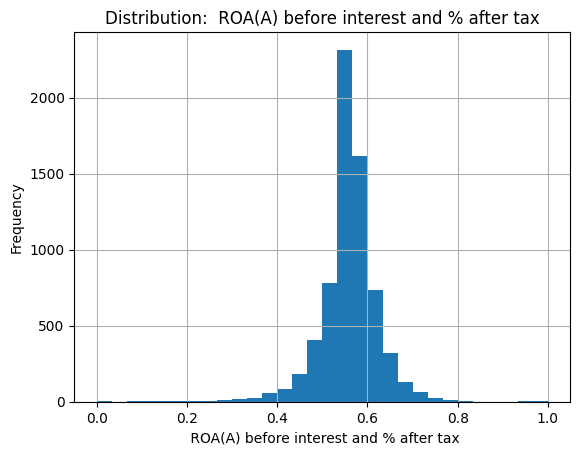

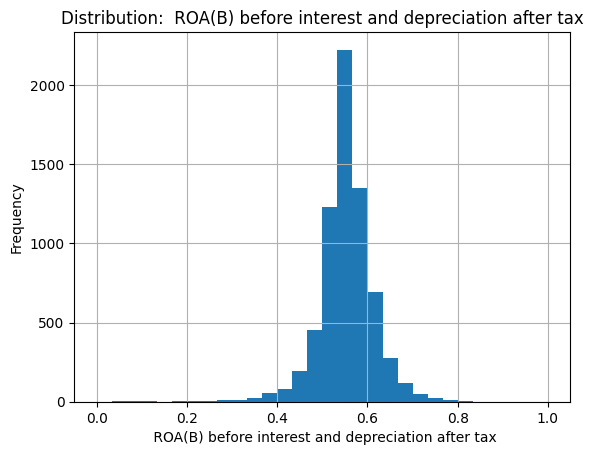

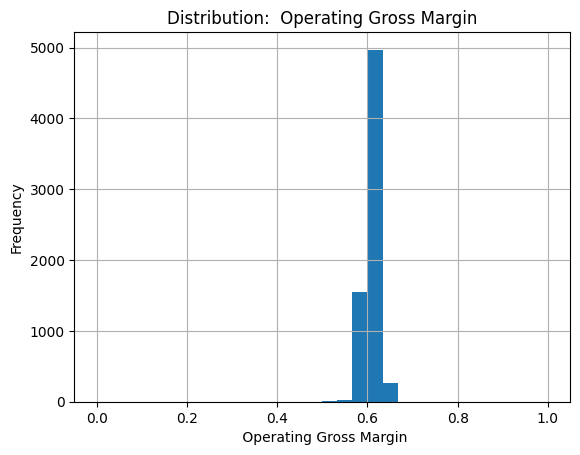

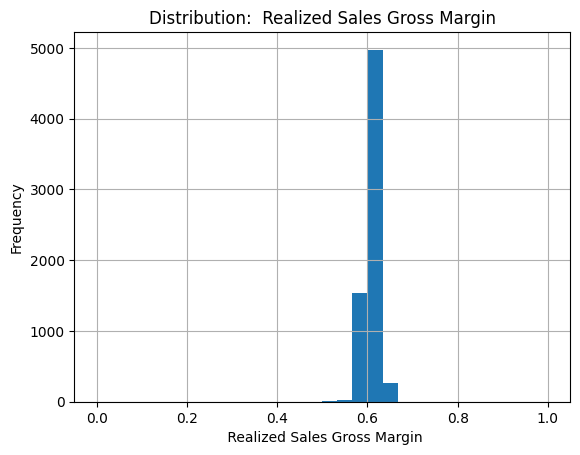

In [16]:
sample_num_cols = num_cols[:6]   # choose important ones

for col in sample_num_cols:
    df[col].hist(bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


6.2 Categorical Distributions

In [17]:
for col in cat_cols[:5]:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))


# 7) Bivariate Analysis (Feature vs Target)

7.1 Group Statistics

In [18]:
selected_features = sample_num_cols

group_stats = df.groupby(TARGET_COL)[selected_features].agg(['mean','median','std'])
group_stats


Bankrupt?              ROA(C) before interest and depreciation before interest                      ROA(A) before interest and % after tax                      \
               mean median  std                                                     mean    median       std                                    mean    median       std   
Bankrupt?                                                                                                                                                                  
0               0.0    0.0  0.0                                           0.508069        0.504314  0.057694                                0.562015  0.561219  0.060898   
1               1.0    1.0  0.0                                           0.418503        0.441330  0.081068                                0.456947  0.490215  0.107674   

           ROA(B) before interest and depreciation after tax                      Operating Gross Margin                      Realized Sales Gross Margin                      
                                                        mean    median       std                    mean    median       std                         mean    median       std  
Bankrupt?                                                                                                                                                                      
0                                                   0.556659  0.553563  0.057864                0.608257  0.606235  0.016920                     0.608237  0.606228  0.016903  
1                                                   0.461483  0.488597  0.091825                0.598670  0.598802  0.014595                     0.598717  0.598899  0.014583

7.2 Boxplots

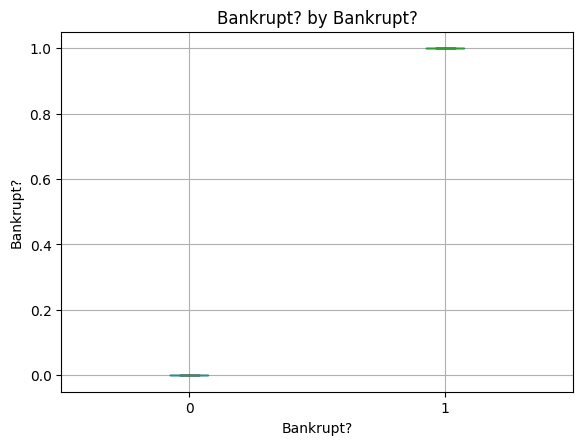

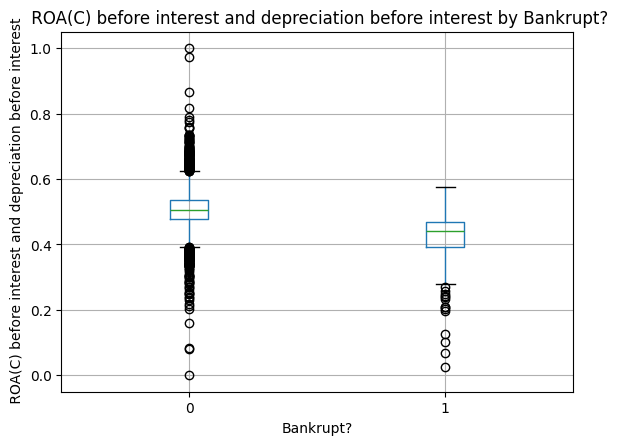

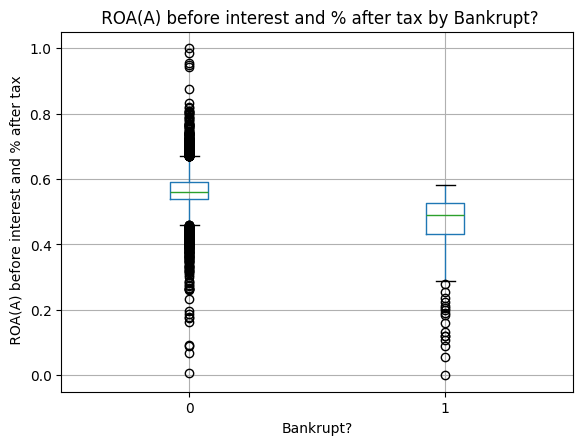

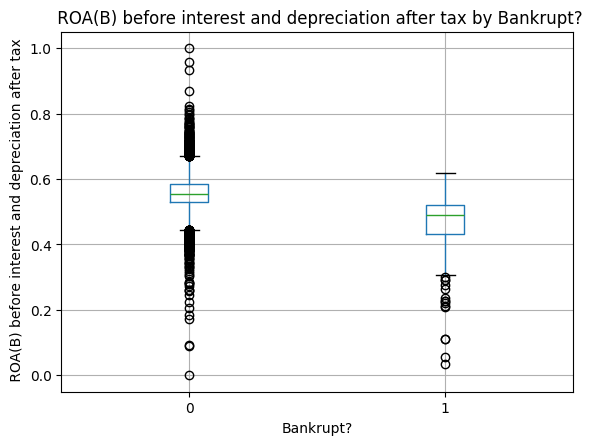

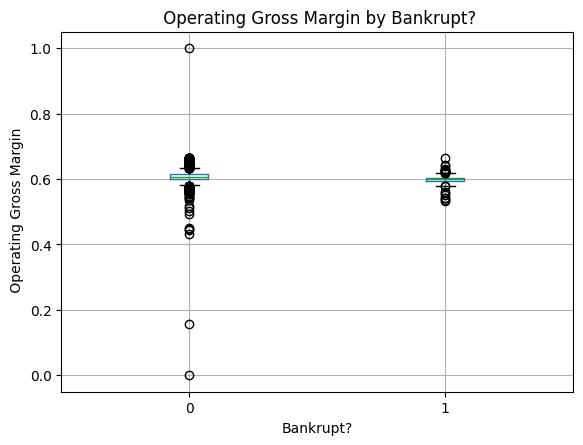

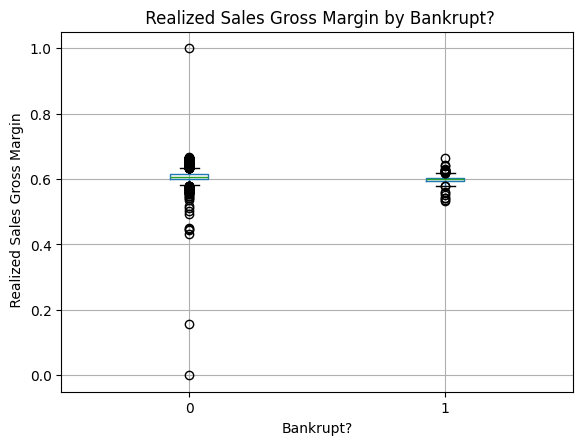

In [19]:
for col in selected_features:
    df.boxplot(column=col, by=TARGET_COL)
    plt.title(f"{col} by {TARGET_COL}")
    plt.suptitle("")
    plt.xlabel(TARGET_COL)
    plt.ylabel(col)
    plt.show()


# 8) Outlier Analysis (IQR Method)

In [20]:
outlier_summary = []

for col in selected_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary.append([col, outliers, lower, upper])

pd.DataFrame(outlier_summary,
             columns=["feature","outlier_count","lower_bound","upper_bound"]) \
    .sort_values("outlier_count", ascending=False)


,feature,outlier_count,lower_bound,upper_bound
2,ROA(A) before interest and % after tax,561,0.455122,0.669579
3,ROA(B) before interest and depreciation after...,432,0.442034,0.669348
1,ROA(C) before interest and depreciation befor...,391,0.387973,0.624116
4,Operating Gross Margin,320,0.580240,0.634118
5,Realized Sales Gross Margin,318,0.580321,0.633954
0,Bankrupt?,220,0.000000,0.000000


# 9) Correlation Analysis

In [21]:
corr = df[num_cols].corr()
corr.shape


(96, 96)

Find Highly Correlated Pairs

In [22]:
threshold = 0.85
pairs = []

cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr.iloc[i, j]
        if abs(val) >= threshold:
            pairs.append((cols[i], cols[j], val))

high_corr_pairs = pd.DataFrame(pairs,
                               columns=["feature_1","feature_2","corr"]) \
                    .sort_values("corr", key=lambda s: s.abs(), ascending=False)

high_corr_pairs.head(20)


,feature_1,feature_2,corr
34,Current Liabilities/Liability,Current Liability to Liability,1.000000
35,Current Liabilities/Equity,Current Liability to Equity,1.000000
29,Debt ratio %,Net worth/Assets,-1.000000
7,Operating Gross Margin,Gross Profit to Sales,1.000000
18,Net Value Per Share (A),Net Value Per Share (C),0.999837
6,Operating Gross Margin,Realized Sales Gross Margin,0.999518
8,Realized Sales Gross Margin,Gross Profit to Sales,0.999518
16,Net Value Per Share (B),Net Value Per Share (A),0.999342
17,Net Value Per Share (B),Net Value Per Share (C),0.999179
24,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,0.998696


# 10) Feature Insights

1. Bankrupt companies have lower profitability ratios.
2. High debt ratio is strongly linked to bankruptcy.
3. Companies with low liquidity show higher bankruptcy risk.
4. Some features are highly skewed and may need transformation.
5. Class imbalance exists in the dataset.


# 11) Recommendations

- Monitor debt ratio and liquidity ratios regularly.
- Focus on improving cash flow management.
- Handle class imbalance before modeling.
- Remove highly correlated features before training models.


# 12) Optional: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
